## 2.1 iris 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
print(data.data.shape, data.target.shape)
print(data.target_names, data.feature_names)

(150, 4) (150,)
['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[Quiz] DecisionTreeClassifier를 이용하여 iris 데이터 분류모델을 작성하여 test에 대한 score를 계산하자.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [5]:
best= {}
best['score'] = 0
mds = [3,4,5]
msls = range(2, 11)
mlns = range(7, 12)
for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md, 
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            m.fit(X_train, y_train)
            score = m.score(X_test, y_test)
            print(f"current score is {score} at md={md}, msl={msl}, mln={mln}")
            if score > best['score']:
                print(f"current best score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m
print(best)

current score is 0.9736842105263158 at md=3, msl=2, mln=7
current best score is 0.9736842105263158 at md=3, msl=2, mln=7
current score is 0.9736842105263158 at md=3, msl=2, mln=8
current score is 0.9736842105263158 at md=3, msl=2, mln=9
current score is 0.9736842105263158 at md=3, msl=2, mln=10
current score is 0.9736842105263158 at md=3, msl=2, mln=11
current score is 0.9736842105263158 at md=3, msl=3, mln=7
current score is 0.9736842105263158 at md=3, msl=3, mln=8
current score is 0.9736842105263158 at md=3, msl=3, mln=9
current score is 0.9736842105263158 at md=3, msl=3, mln=10
current score is 0.9736842105263158 at md=3, msl=3, mln=11
current score is 0.9736842105263158 at md=3, msl=4, mln=7
current score is 0.9736842105263158 at md=3, msl=4, mln=8
current score is 0.9736842105263158 at md=3, msl=4, mln=9
current score is 0.9736842105263158 at md=3, msl=4, mln=10
current score is 0.9736842105263158 at md=3, msl=4, mln=11
current score is 0.9736842105263158 at md=3, msl=5, mln=7
cur

In [6]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

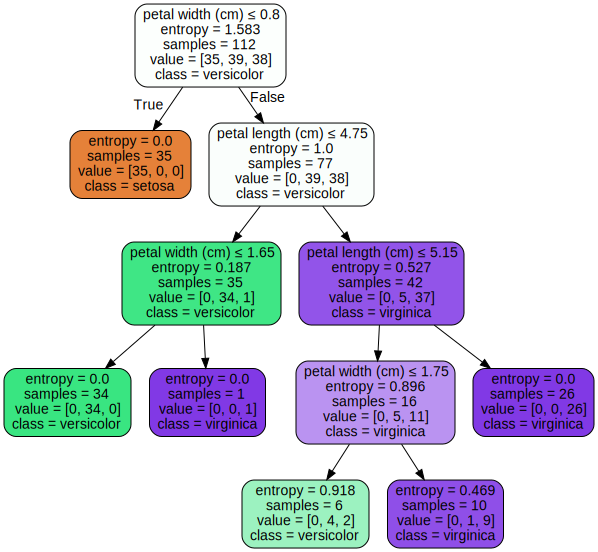

In [7]:
tree = model.tree_
import graphviz
from sklearn.tree import export_graphviz, plot_tree

dot_data = export_graphviz(model, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 2.2 EDA 및 전처리

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
np.unique(data.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [11]:
print(data.target_names.shape, data.target_names[data.target].shape)

(3,) (150,)


In [12]:
np.hstack((data.target.reshape(-1,1), data.target_names[data.target].reshape(-1,1)))

array([['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'se

In [13]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris['Species'] = data.target_names[data.target]
iris.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.isna().sum()

sl         0
sw         0
pl         0
pw         0
Species    0
dtype: int64

결측값 처리 방법:
1. 결측값 제거: dropna
2. 결측값 대체:
 - fillna
 - interpolate
 
### 2.2.1 EDA

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [18]:
iris.Species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

### 2.2.2 시각화

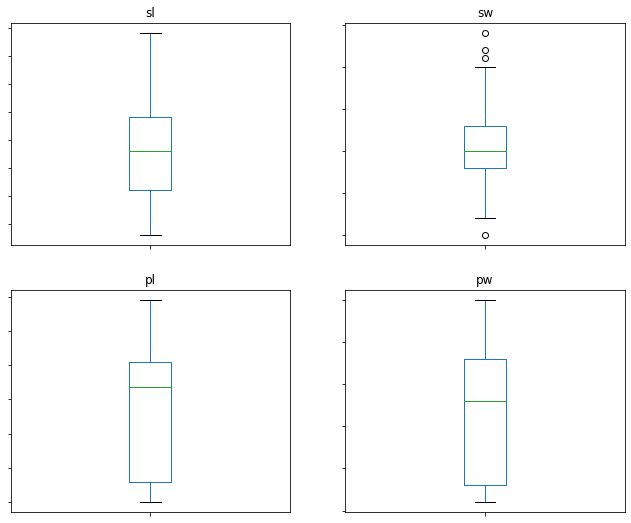

In [19]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True, top=False,
                       right=False, bottom=True, labelleft=False,
                       labeltop=False, labelright=False, labelbottom=False)
        dataset[col].plot(kind='box', subplots=True, sharex=False, sharey=False)
        plt.title(col)
        i += 1
    plt.show()
    
boxplot_iris(iris.columns[:-1], iris)

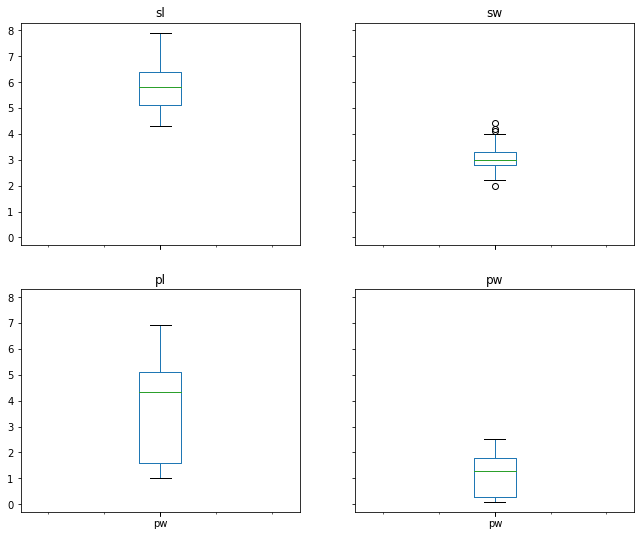

In [20]:
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharex=True, sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    iris.iloc[:, i].plot(kind='box', ax=ax)
    ax.set_title(iris.columns[i])
plt.show()

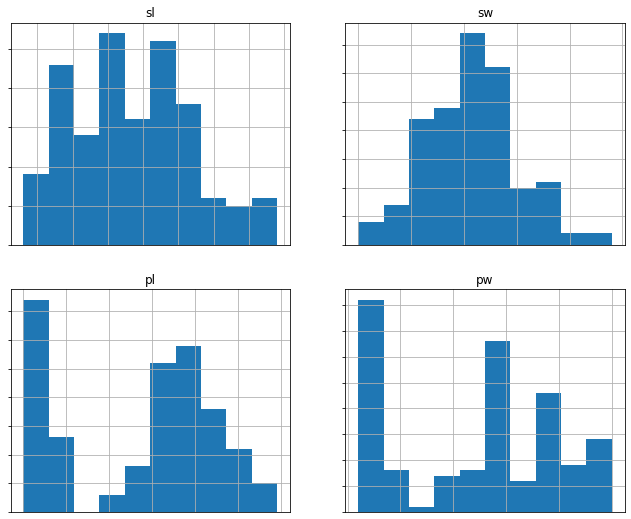

In [21]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True, top=False,
                       right=False, bottom=False, labelleft=False,
                       labeltop=False, labelright=False, labelbottom=False)
        dataset[col].hist()
        plt.title(col)
        i += 1
    plt.show()
    
histogram_iris(iris.columns[:-1], iris)

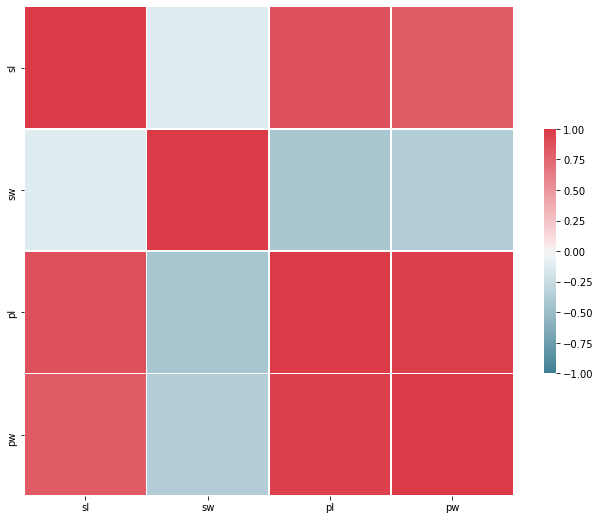

In [22]:
corr = iris.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [23]:
corr

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


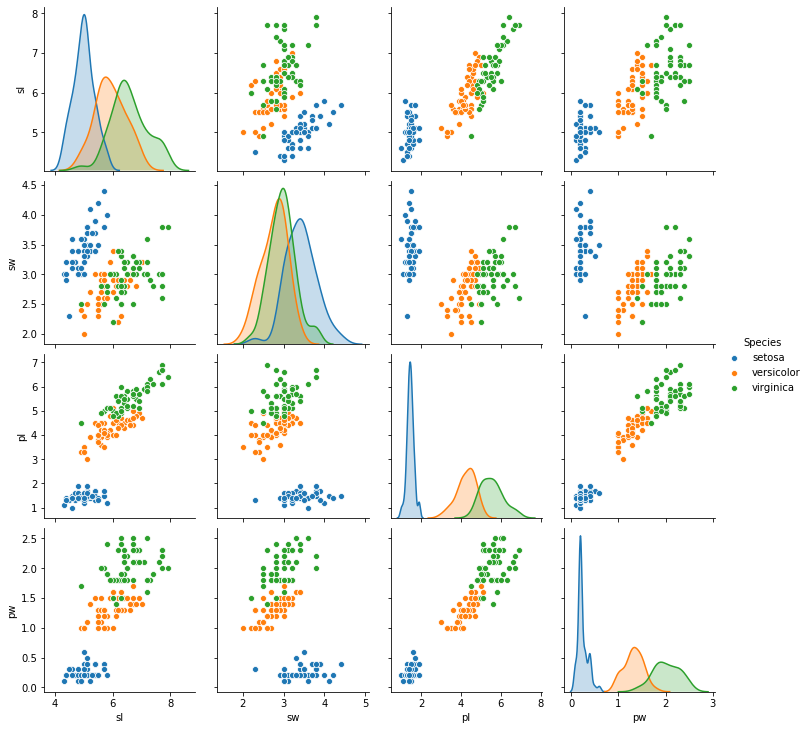

In [24]:
sns.pairplot(iris, hue='Species')
plt.show()

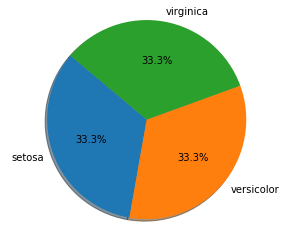

In [25]:
def piechart_iris(feature_names, target, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for colName in [target]:
        labels = []; sizes = []
        df = dataset.groupby(colName).size()
        for key in df.keys():
            labels.append(key)
            sizes.append(df[key])
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=False, top=False,
                       right=False, bottom=False, labelleft=True,
                       labeltop=True, labelright=False, labelbottom=False)
        plt.pie(sizes, labels=labels, autopct='%1.1f%%',
               shadow=True, startangle=140)
        plt.axis('equal')
        i += 1
    plt.show()
    
piechart_iris(iris.columns[:-1], iris.Species, iris)

In [26]:
iris.groupby('Species').size().keys()

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')

In [27]:
iris.groupby('Species').size()['setosa']

50

### 2.2.3 data split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.33, random_state=42
)

## 2.3 모델 학습
### 2.3.1 base 모델

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [30]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.98

### 2.3.2 모델 일반화를 위한 cross-validation
이때, cross_val_score는 hyper-parameter를 선택하는 데 사용하고, 직접적으로 학습된 모델을 변환시키지는 않는다. 따라서 cross_val_score에서 사용된 모델은 한번 더 학습을 시켜야한다. 
#### 1) KFold

In [31]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
results =cross_val_score(model, X_train, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")
    
print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.9
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 0.8
3번째 교차검증 정확도: 1.0
4번째 교차검증 정확도: 0.8
5번째 교차검증 정확도: 0.9
6번째 교차검증 정확도: 1.0
7번째 교차검증 정확도: 0.9
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0

교차검증 최종 정확도: 0.93


#### StratifiedKFold

In [32]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results =cross_val_score(model, X_train, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")
    
print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.9
1번째 교차검증 정확도: 0.9
2번째 교차검증 정확도: 0.8
3번째 교차검증 정확도: 0.9
4번째 교차검증 정확도: 1.0
5번째 교차검증 정확도: 1.0
6번째 교차검증 정확도: 0.9
7번째 교차검증 정확도: 0.8
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0

교차검증 최종 정확도: 0.9199999999999999


[Quiz] 튜닝할 hyper-parameter를 다양하게 조정해서 각 튜닝 모델의 평가 정확도를 진지하게 알아보기 위해 kFold를 적용하여 가장 정확도가 높은 파라미터를 탐색해보자.

In [33]:
best= {}
best['score'] = 0
mds = [3,4,5]
msls = range(2, 11)
mlns = range(7, 12)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md, 
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            results = cross_val_score(m, X_train, y_train, cv=cv)
            score = results.mean()
            print(f"current val score is {score} at md={md}, msl={msl}, mln={mln}")
            if score > best['score']:
                print(f"current best val score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m

print(f"\n\n best val score is {best['score']} at md={best['md']}, msl={best['msl']}, mln={best['mln']}")
m = best['model'].fit(X_train, y_train)
testScrore = best['model'].score(X_test, y_test)
print(f"real Test score is {testScrore}")

current val score is 0.9400000000000001 at md=3, msl=2, mln=7
current best val score is 0.9400000000000001 at md=3, msl=2, mln=7
current val score is 0.9400000000000001 at md=3, msl=2, mln=8
current val score is 0.9400000000000001 at md=3, msl=2, mln=9
current val score is 0.9400000000000001 at md=3, msl=2, mln=10
current val score is 0.9400000000000001 at md=3, msl=2, mln=11
current val score is 0.9400000000000001 at md=3, msl=3, mln=7
current val score is 0.9400000000000001 at md=3, msl=3, mln=8
current val score is 0.9400000000000001 at md=3, msl=3, mln=9
current val score is 0.9400000000000001 at md=3, msl=3, mln=10
current val score is 0.9400000000000001 at md=3, msl=3, mln=11
current val score is 0.93 at md=3, msl=4, mln=7
current val score is 0.93 at md=3, msl=4, mln=8
current val score is 0.93 at md=3, msl=4, mln=9
current val score is 0.93 at md=3, msl=4, mln=10
current val score is 0.93 at md=3, msl=4, mln=11
current val score is 0.93 at md=3, msl=5, mln=7
current val score i

### 2.3.3 learning curve
학습데이터 증가에 따른 모델 성능 곡선을 그려보기 위해 scikit-plot을 아래와 같이 설치한다.
```bash
!pip install scikit-plot
```

학습데이터에 대해 지나치게 overfit하는 모델보다는 규제가 있는 모델이 더 좋다. 그러나, 어떤 규제를 얼마만큼 줘야하는 지는 모르죠. 따라서 규제 정도를 선택하기 위해 모델을 튜닝하는 것이다.

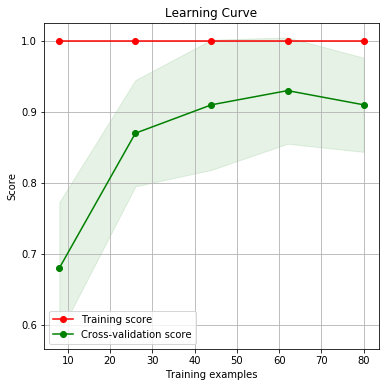

In [34]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6),
                                    random_state=42)
plt.show()

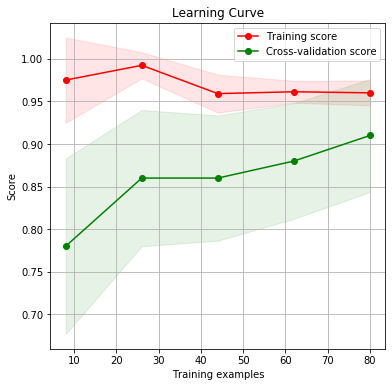

In [35]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(m, X_train, y_train, figsize=(6,6),
                                    random_state=42)
plt.show()

### 2.3.4 모델 튜닝

In [42]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
params= {'max_depth':range(4, 13, 2),
        'criterion':['gini', 'entropy'],
        'splitter':['best', 'random'],
        'min_weight_fraction_leaf':[0.0, 0.1, 0.2, 0.3],
        'random_state':[7, 23, 42, 78, 142],
        'min_impurity_decrease':[0., 0.05, 0.1, 0.2]}
model = GridSearchCV(estimator, params, cv=cv, verbose=1,
                    n_jobs=-1, refit=True)

# refit=True인 경우라면 학습은 불필요하다. 
model.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 10584 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   16.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecat...
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [43]:
print(f"Best Estimator: {model.best_estimator_}\n")
print(f"Best Params: {model.best_params_}\n")
print(f"Best Scorer: {model.best_score_}\n")

Best Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='random')

Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'random'}

Best Scorer: 0.97



## 2.4 평가지표 및 모델 평가
### 2.4.1 정확도의 함정

In [44]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'Accuracy : {acc}')

Accuracy : 0.98


In [45]:
model.score(X_test, y_test)

0.98

### 2.4.2 Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test, pred)
print(f"Confusion Matrix : \n{confMatrix}")

Confusion Matrix : 
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [47]:
print(f"Accuracy : \n{confMatrix.trace()/confMatrix.sum()}")

Accuracy : 
0.98


1. 실제:
 - setosa: 19
 - versicolor: 15
 - verginica: 16
2. 예측:
 - setosa: 19
 - versicolor: 16
 - verginica: 15

In [48]:
print(f'실제 타겟값의 수: {confMatrix.sum(axis=1)}')
print(f'예측 타겟값의 수: {confMatrix.sum(axis=0)}')

실제 타겟값의 수: [19 15 16]
예측 타겟값의 수: [19 16 15]


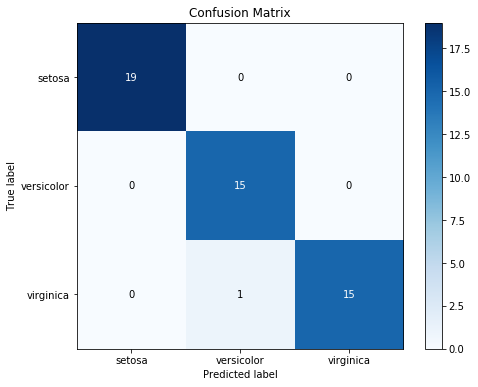

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, pred, figsize=(8,6))
plt.show()

### 2.4.3 precision/ recall/ f-score

In [50]:
from sklearn.metrics import precision_score

precisions = precision_score(y_test, pred, average=None)
for target, score in zip(data.target_names, precisions):
    print(f"{target}의 정밀도: {score}")

setosa의 정밀도: 1.0
versicolor의 정밀도: 0.9375
virginica의 정밀도: 1.0


In [51]:
confMatrix

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

[Quiz] confMatrix를 이용해 각각의 범주별로 precisions 및 recalls 등을 계산해보자.
- recall(재현율): 실제 Positive인 것 중에서 Positive로 예측한 비율
- precision(정밀도): Positive라 주장한 것 중에서 실제 Positive인 비율
- specification(특이도): 실제 Negative인 것 중에서 Negative로 예측한 비율

In [52]:
precs = []
rcls = []
specs = []
for i in range(3):
    TP = confMatrix[i, i]
    FN = confMatrix[i].sum() - TP
    FP = confMatrix[:,i].sum() - TP
    TN = confMatrix.sum() - TP - FN - FP
#     TN = confMatrix.trace() - TP
    precs.append(TP/(TP+FP))
    rcls.append(TP/(TP+FN))
    specs.append(TN/(TN+FP))
    
precs = np.array(precs)
rcls = np.array(rcls)
specs = np.array(specs)
fall_outs = 1 - specs

print(precs)
print(rcls)
print(specs)
print(fall_outs)

[1.     0.9375 1.    ]
[1.     1.     0.9375]
[1.         0.97142857 1.        ]
[0.         0.02857143 0.        ]


4가지 새로운 개념과 전체 Count:
1. Real Count
 - RP: 실제 Positive. TP + FN
 - RN: 실제 Negative. TN + FP
2. Predict Count
 - PP: 예측 Positive. TP + FP
 - PN: 예측 Negative. TN + FN
3. 전체 Count
 - TC = TP + FN + FP + TN = RP + PP - TP + TN
 - TN = TC - RP - PP + TP

In [53]:
precs = []
rcls = []
specs = []
for i in range(3):
    TP = confMatrix[i, i]
    RP = confMatrix[i].sum()
    PP = confMatrix[:,i].sum()
    TN = confMatrix.sum() - RP - PP + TP
    precs.append(TP/PP)
    rcls.append(TP/RP)
    specs.append(TN/(confMatrix.sum() - RP))
    
precs = np.array(precs)
rcls = np.array(rcls)
specs = np.array(specs)
fall_outs = 1 - specs

print(precs)
print(rcls)
print(specs)
print(fall_outs)

[1.     0.9375 1.    ]
[1.     1.     0.9375]
[1.         0.97142857 1.        ]
[0.         0.02857143 0.        ]


당연히 confMatrix를 이용해 recall을 계산해볼 수 있다.

In [54]:
from sklearn.metrics import recall_score

recalls = recall_score(y_test, pred, average=None)
for target, score in zip(data.target_names, recalls):
    print(f"{target}의 재현율: {score}")

setosa의 재현율: 1.0
versicolor의 재현율: 1.0
virginica의 재현율: 0.9375


F-스코어는 정밀도와 재현율의 가중조화평균이다. 보통은 등가중평균인 F1-스코어를 주로 사용한다.

In [55]:
from sklearn.metrics import f1_score

F1scores = f1_score(y_test, pred, average=None)
for target, score in zip(data.target_names, F1scores):
    print(f"{target}의 F1점수: {score}")

setosa의 F1점수: 1.0
versicolor의 F1점수: 0.967741935483871
virginica의 F1점수: 0.967741935483871


[Quiz] Confusion Matrix를 F-1 스코어를 계산해보자.
$$F1 = \cfrac {2}{\cfrac{1}{P} + \cfrac{1}{R}} = \cfrac {2TP}{RP + PP} = \cfrac {2TP}{2TP + FP + FN}$$

In [56]:
F1 = 2 / (1/precs + 1/rcls)
F1

array([1.        , 0.96774194, 0.96774194])

In [57]:
TParr = confMatrix.diagonal()
RParr = confMatrix.sum(axis=1)
PParr = confMatrix.sum(axis=0)
F1 = 2*TParr / (RParr + PParr)
F1

array([1.        , 0.96774194, 0.96774194])

#### classification_report
정확도, 정밀도, 재현율, 지지도, f1 스코어를 모두 측정하여 출력해준다.

In [58]:
from sklearn.metrics import classification_report

classReport = classification_report(y_test, pred)
print(f"Classification Report : \n{classReport}")

Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



- macro avg: 3개의 class들에 대한 산술 평균
- weighted avg: support로 weighting한 가중 평균값

[Quiz] Support(지지도)는 무엇을 의미할까요?

In [59]:
y_test.value_counts()

setosa        19
virginica     16
versicolor    15
Name: Species, dtype: int64

### 2.4.4 ROC curve 와 AUC
이전과 달리 예측값이 아닌 예측 확률을 이용한다.
- R, P, F : 예측한 범주(yhat = 0, 1, 2)의 수를 이용하였다.
- ROC, AUC: 범주에 대한 예측확률(yhat = P(y=0), P(y=1), P(y=2))을 이용한다.

특정 class 별로 class에 대한 예측확률이 높은 순으로 데이터를 재정렬한다.

예를 들면 setosa에 대해:
1. setosa에 대한 예측 확률이 높은 순으로 정렬한다.
2. 각 정렬순으로 해당 확률값을 classification의 threshold값으로 정한다.
3. 이때의 TPR과 FPR를 구해서 점을 찍는다.
4. 1 ~ 3의 과정을 모든 데이터에 대해 반복하면서 점을 찍으면 curve가 완성된다.

TPR(Sensitivity, 민감도) = Recall : 실제 Positive인 것 중에서 Positive로 예측한 비율
- Recall : 새로운 Positive 데이터로 측정할 때, 동일하게 Positive로 판정할 확률
- Sensitivity: Positive로 아슬아슬하게 판정되는 Positive를 Positive로 판정할 확률

FPR(Fall-out, 위양성률) : 실제 Negative인 것 중에서 Positive로 잘못 예측한 비율

In [60]:
pred[:10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

pred_proba는 (n, d) shape을 가지며, 각 sample이 d 개의 클래스에 속할 확률을 갖는다.

In [61]:
pred_proba = model.predict_proba(X_test)
pred_proba[:10]

array([[0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606]])

In [ ]:
y_test[:10]

In [62]:
viewPoint = np.hstack((pred_proba, y_test.values.reshape(-1, 1)))
viewPoint[:10]

array([[0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor']],
      dtype=object)

Setosa일 확률이 높은 순으로 정렬할 때:

In [63]:
viewPoint[np.argsort(pred_proba[:,0])[::-1]]

array([[1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor']

versicolor일 확률이 높은 순으로 정렬할 때:

In [64]:
viewPoint[np.argsort(pred_proba[:,1])[::-1]]

array([[0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'virginica'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.

virginica일 확률이 높은 순으로 정렬할 때:

In [66]:
viewPoint[np.argsort(pred_proba[:,2])[::-1]]

array([[0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.0625, 0.9375, 'virginica'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061, 'versicolor'],
       [0.0, 0.9393939393939394, 0.06060606060606061

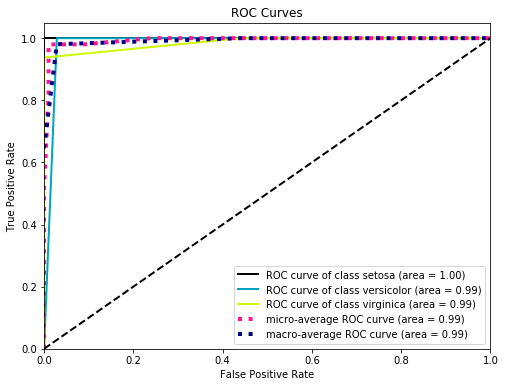

In [67]:
skplt.metrics.plot_roc(y_test, pred_proba, figsize=(8, 6))
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score

# multi-class에 대해서 현재 각 class 별로 AUC를 제공하지 못함.
aucs = roc_auc_score(y_test, pred_proba, multi_class='ovr')
print(f"ROC-AUC score is meaned with : \n{aucs}")

ROC-AUC score is meaned with : 
0.9906425070028012


In [69]:
iris.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


이제까지의 작업절차:
1. train과 test를 분리하고
2. train에서 10Fold로 CrossValidation을 하여 최적의 DecisionTreeClassifier의 하이퍼파라미터를 선정하여 best_estimator를 구함
3. 이 best_estimator는 오직 train으로부터만 학습하고 평가되었으므로 
 - 최종 평가를 위해 Accuracy, Recall, Precision, F1, ROC_AUC를 test 데이터로 검증
4. 최종적으로 소율하고 있는 모든 데이터로 학습하여 최종 모델을 생성

In [70]:
model.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   17.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecat...
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [71]:
import pickle

with open('final_model.pickle', 'wb') as fp:
    pickle.dump(model, fp)

In [72]:
f = open('final_model.pickle', 'rb')
model = pickle.load(f); f.close()

predicts = model.predict(iris.iloc[:, :-1])
iris['preds'] = predicts
iris.to_csv('FinalResult.csv', index=False)

In [74]:
(iris['Species'] == iris['preds']).mean()

0.9866666666666667